# ME 405 Term Project - Line Follower Robot


## Overview
This project involved the design and code implementation of a line-following robot based on the Romi chassis. The robot is capable of detecting and following a line and obstacles on a printed track using sensors and custom algorithms. The goal was to achieve reliable performance for the time-trial competition. 

# Included Files
- main.py
    - Defines tasks for motor control, IMU reading, line sensor processing, bump sensor detection, and other logic.
    - Serves as the main program file for the robot. 
- boot.py
    - Executes on boot and sets up the MicroPython board for board initialization
- pybcdc.inf
    - Contains Windows driver information for interfacing with the MicroPython board via USB
- cotask.py
    - Provides a cooperative multitasking framework using tasks created as generator functions
    - Includes a scheduler to manage task execution based task scheduling
- task_share.py
    - Implements classes for data sharing between tasks
    - Includes Queu and Share classes for managing shared data and inter-task communication
- BNO055_Driver.py
    - Implements a driver for the BNO055 IMU sensor.
    - Provides methods to configure the sensor, read and write calibration data, and retrieve orientation and angular velocity readings.
- Motor_Driver.py
    - Provides a driver to control DC motors using PWM
    - Gives the user the ability to set motor speed and direction
- Encoder_Driver.py
    - Implements a method to read quadrature encoder values such as position and velocity
- linesensor_driver.py
    - Provides methods to measure reflectivity using the IR emitters and sensors

## Features
- **Sensors**:
    - IR Line Sensor Array
    - BNO055 IMU
    - Two Motor Encoders
    - Switch Bump Sensors
- **Actuators**:
    - Two DC motors
- **Pololu Romi Chassis Kit**
    - Motor Driver and Power Distribution Board (Pololu item #: 3543)
    - Romi Encoder Pair
    - Romi Chassis (Pololu item #: 3500, 3501, 3502, 3504, 3506, or 3509)
- **Programming**:
    - Ran in a task-based structure using the scheduler
    - PID Control
    - Sensor Drivers
    - Line-following Control for curves, dotted lines, straight paths, and end detection
    - Prescribed Path-following 


## Mechanical Setup
In this project we installed switch bump sensors, line sensors, and an IMU onto the Romi chassis. The bump sensors came with screws that went into mounting holes that lined up with the Romi chassis so we installed it by screwing it into place. The line sensor array lined up with to larger cutouts that allowed the pins to extend above the chassis for wire connection. We zip-tied the pins to standoffs to secure these sensors into place. The IMU was connected to a breadboard and double sided tape to secure it above the bump sensors. 

## Motor PID Control
The motor used a PID control algorithm to maintain a set speed. We began our controls design process by implementing the PID loop below. We derived the $K_P$ constant by using known information of the motor from the Pololu website and found $K_{ff}$, $K_D$ and $K_I$ through iteration. 


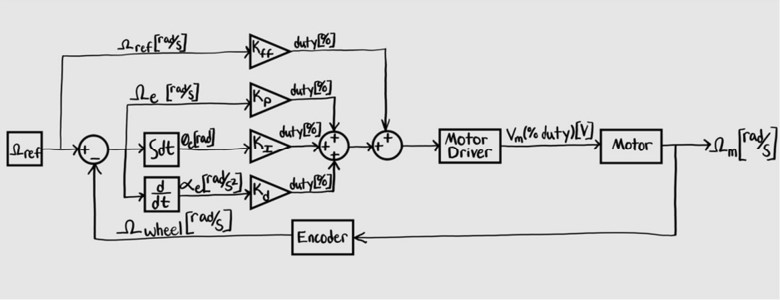

$$
K_V = \frac{150RPM*\frac{2Πradians-minutes}{60seconds-revolutions}}{4.5V}
$$
$$
V_{battery} = 6*1.45V
$$
$$
\omega_{shaft} = K_V*V_{battery}
$$
$$
\omega_{wheel} = \frac{\omega_{shaft}}{120}
$$
$$
K_P = \frac{100}{\omega_{shaft}}
$$
$$
K_P = 3.293 [\frac{\%}{rad/s}]
$$

# Motor A Step Response
$K_{ff}=3.1, K_P=3.92, K_d = 0.00001, K_i = 10$

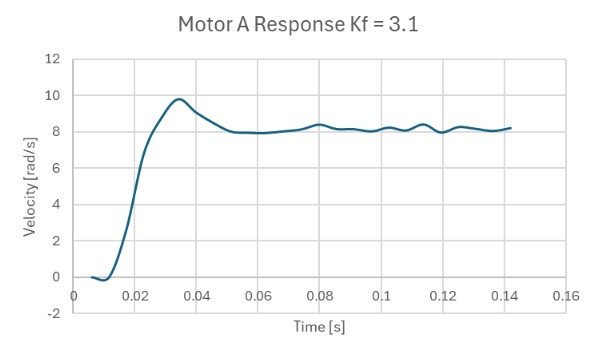

Our initial value for $K_{ff}$ resulted in a steady state error of around $0.79\frac{rad}{s}$ indicating that it is too low. Increasing the feed forward constant would increase the duty cycle sent to the motor and reduce steady state error. 

$K_{ff}=4.5, K_P=3.92, K_d=0.00001, K_i=10$

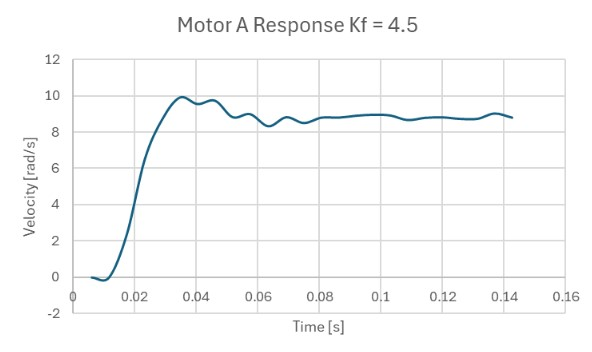

We increased $K_{ff}$ and found that there was negligible steady state error in our step response. The motor speed remained steady with minor oscillations around the set-point. 

$K_{ff}=4.5, K_P=20, K_d=0.00001, K_i=10$

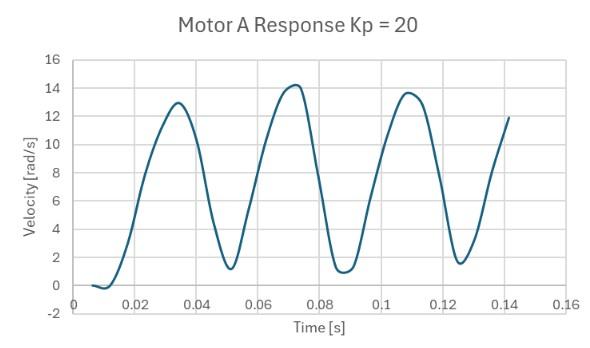

Through iterating on $K_P$ we noticed that the motor oscillated and produced an underdamped response. 

$K_{ff}=4.5, K_P=3.92, K_d=0.001, K_i=10$

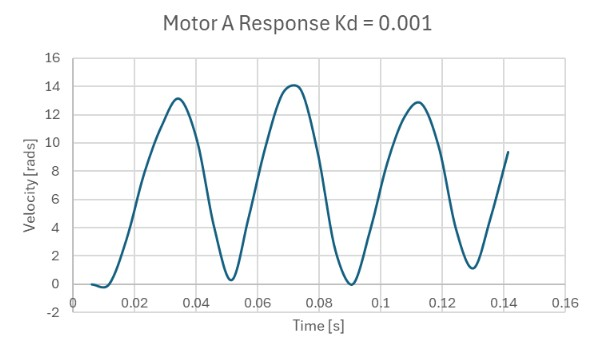

Iterating on the derivative constant $K_d$ lead to a similar underdamped response.

# Motor B Step Response

$K_{ff}=3.3, K_P=3.92, K_d=0.00001, K_i=10$

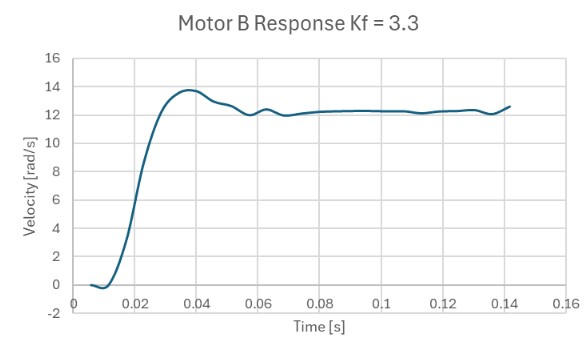

Our initial feed forward constant $K_{ff}$ produced a steady state error of $2\frac{rad}{s}$. In order to reduce the steady state error, we can increase the feed forward constant so that motor B experiences a higher duty cycle. 

$K_{ff}=4.6, K_P=3.92, K_d=0.00001, K_i=10$

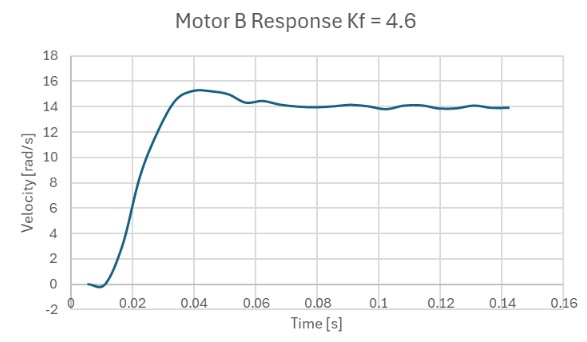

Increasing $K_{ff}$ resulted in negligible steady state error and a steady motor speed. The feed forward constant was different than motor A which can be attributed to differences between the motor constants of the two motors. 

$K_{ff}=4.6, K_P=20, K_d=0.00001, K_i=10$

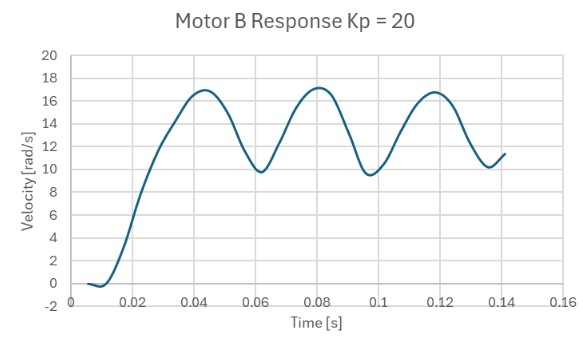

We increased $K_P$ and observed an underdamped step response where the motor speed oscillated around $13.5\frac{rad}{s}$.

$K_{ff}=4.6, K_P=3.92, K_d=0.001, K_i=10$

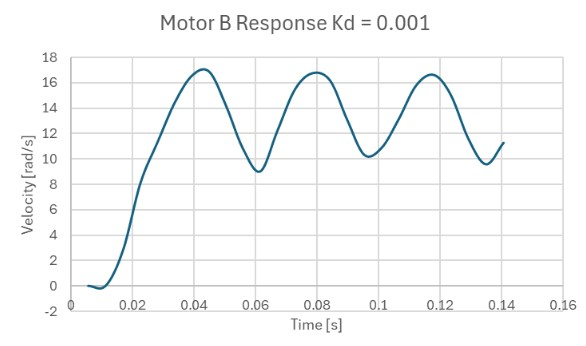

Through testing different PID and $K_{ff}$ constants, we found that these constants produced the least steady state error:
$$
Motor A: $K_{ff}=4.5, K_P=3.92, K_d=0.00001, K_i=10$
$$
$$
Motor B: $K_{ff}=4.6, K_P=3.92, K_d=0.00001, K_i=10$
$$

## Pinout 

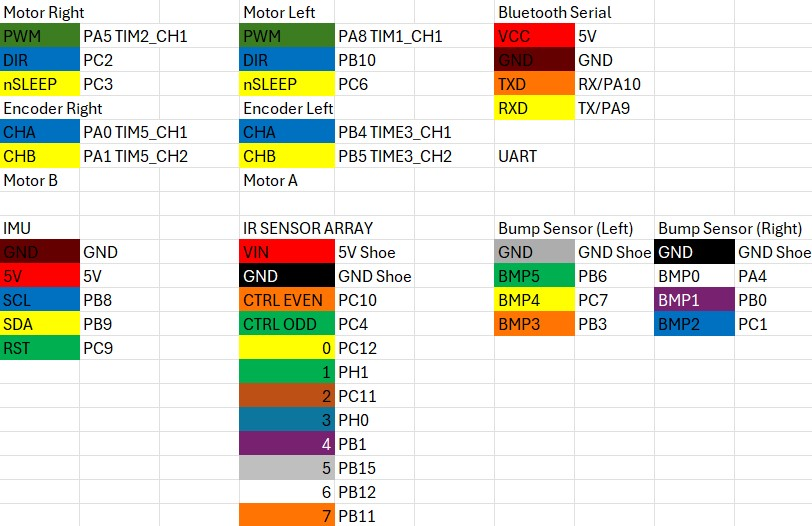				
